In [1]:
import pandas as analytics
import numpy as maths
import matplotlib.pyplot as graph
import os
from math import exp , log, log10

In [2]:
from math import exp

In [3]:
os.chdir('../dependencies/')
from logistic_regression import logistic_regression

In [4]:
def loss(f_x,y):
    if y == 1 : return y*log(abs(f_x))
    else : return (1-y)*log(abs(1-f_x))
    

In [5]:
def plot_graph(name,var):
    figure = graph.figure(figsize = (15,10))
    graph.ylabel(name)
    graph.xlabel("Iterations")
    graph.title(name)
    graph.plot(var,label=name)
    graph.legend()
    graph.grid(True)
    

In [6]:
def norm(vector):
    vector = [v**2 for v in vector]
    vector = float(sum(vector))
    vector = vector ** 0.5
    return vector

# def sigmoid(x,w):
#     f_x = 1/(1 + exp(-float(maths.matmul(w.T,x)))) 
#     return f_x

def logit(f_x):
    if f_x == 1: return 0
    if f_x == 0: return 1
    else : return log(abs(f_x)/abs(1-f_x))

In [7]:
def create_confusion_matrix(y,y_hat):
    """ Creating the confusion matrix """

    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(y)):
        if y[i] == y_hat[i] == 1:
            tp = tp + 1
        elif y[i] == y_hat[i] == 0:
            tn = tn + 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn = fn + 1
        else :
            fp = fp + 1

    confusion_matrix = {'tp':tp,'tn':tn,'fp':fp,'fn':fn}
    print("Confusion Matrix : ",confusion_matrix)
    accuracy = round((confusion_matrix['tp']+confusion_matrix['tn'])/(confusion_matrix['tp'] + confusion_matrix['tn'] + confusion_matrix['fp'] + confusion_matrix['fn'])*100,2)
    precision = round((confusion_matrix['tp'])/(confusion_matrix['fp']+confusion_matrix['tp'])*100,2) 
    sensitivity = round((confusion_matrix['tp'])/(confusion_matrix['tp']+confusion_matrix['fn'])*100,2)
    specificity = round((confusion_matrix['tn'])/(confusion_matrix['fp']+confusion_matrix['tn'])*100,2)

    
    print('Accuracy : ', accuracy)
    print('Precision : ', precision)
    print('Senstivity : ', sensitivity)
    print('Specificity : ', specificity)
    
#     accuracy = find_accuracy()
#     precision = find_precision()
#     sensitivity = find_sensitivity()
#     specificity = find_specificity()
#     fscore = find_fscore()


def find_precision(show = True):
    """ Finding Precision """

    confusion_matrix = confusion_matrix
    precision = round((confusion_matrix['tp'])/(confusion_matrix['fp']+confusion_matrix['tp'])*100,2) 
    if show : print("Precision : ",precision,"%")
    return precision

def find_accuracy(show = True):
    """ Finding Accuracy """

    confusion_matrix = confusion_matrix
    accuracy = round((confusion_matrix['tp']+confusion_matrix['tn'])/(confusion_matrix['tp'] + confusion_matrix['tn'] + confusion_matrix['fp'] + confusion_matrix['fn'])*100,2)
    if show : print("Accuracy : ",accuracy,"%")
    return accuracy

def find_sensitivity(show = True):
    """ Finding Sensivity """

    confusion_matrix = confusion_matrix
    sensitivity = round((confusion_matrix['tp'])/(confusion_matrix['tp']+confusion_matrix['fn'])*100,2)
    if show : print("Sensivity : ",sensitivity,"%")
    return sensitivity

def find_specificity(show = True):
    """ Finding Specificity """

    confusion_matrix = confusion_matrix
    specificity = round((confusion_matrix['tn'])/(confusion_matrix['fp']+confusion_matrix['tn'])*100,2)
    if show : print("Specificity : ",specificity,"%")
    return specificity

def find_fscore(show=True):
    """ Finding FScore """

    confusion_matrix = confusion_matrix
    f_score = round(2/((1/find_precision(False))+(1/find_sensitivity(False))),2)
    if show : print("F1 Score : ",f_score)
    return f_score        


In [8]:
filename = 'data1'
validation_perc = 0.7
training_perc = 0.8
alphas = maths.arange(0,1,0.1)
number_of_iterations = 10
training_perc = 0.7

In [9]:
log_reg = logistic_regression()
log_reg.load_data(filename)
df_validation, df_test = log_reg.split_dataset(validation_perc , training_perc)
# log_reg.find_weights(alphas, number_of_iterations )
# log_reg.classify(df_test)

In [10]:
df_validation = df_validation.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
for col in df_validation.columns[1:-1] :
    maximum = max(df_validation[col])
    minimum = min(df_validation[col])
    diff = maximum - minimum
    
    df_validation[col] = (df_validation[col] - maximum) / diff
    df_test[col] = (df_test[col] - maximum) / diff
df_validation

,x0,x1,x2,y
0,1,-0.897959,-0.367347,1
1,1,-0.530612,-0.836735,0
2,1,-0.224490,0.000000,1
3,1,-0.693878,-0.081633,1
4,1,-0.897959,-0.469388,1
...,...,...,...,...
135,1,-0.673469,-0.632653,0
136,1,-0.591837,-0.571429,0
137,1,-0.448980,-0.938776,0
138,1,-0.612245,-1.000000,0


In [12]:
def sigmoid(x,w):
    return 1/(1 + exp(-float(w.T@x)))

In [13]:
def liklihood(x,y,w):
    y_hat = sigmoid(x,w)
    if y_hat == 1: return y*log(y_hat)
    else : return y*log(abs(y_hat)) + (1-y)*log(abs(1-y_hat))

In [14]:
def norm(z):
    z = list(z)
    return float(sum([z**2 for z in z]))**0.5

In [15]:
def logit(x,w):
    f_x = sigmoid(x,w)
    if f_x == 1 : return 1
    elif f_x == 0 : return 0 
    else : return log(abs(f_x/(1-f_x)))
    

In [16]:
df_validation = df_validation.sample(frac=1)
X = df_validation.iloc[:,:-1].reset_index(drop=True)
Y = df_validation.iloc[:,-1].reset_index(drop=True)

w_star = maths.matrix(maths.random.rand(X.shape[1])).T

w_old = w_star + [1]

epsilon = 1e-3
alpha = 0.1
liklihoods = []
sigmoids = []
weights = []
norms = []

while norm(w_star - w_old) > epsilon :
    
    w_old = w_star
    loss = []

    for i in range(len(X)):
        x = maths.matrix(X.iloc[i]).T
        y = Y.iloc[i]
        y_hat = sigmoid(x,w_star)
        w_star = w_star + alpha * (y - y_hat) * x
        loss.append(liklihood(x,y,w_star))
    
    weights.append(w_star.T)
    sigmoids.append(y_hat)
    norms.append(norm( w_star - w_old ))
    liklihoods.append(sum(loss))

print(w_star)

[[ -26.66497757]
 [-196.53887651]
 [ 169.40834052]]


(array([1.12561e+05, 1.50000e+01, 4.00000e+00, 2.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([9.99999777e-04, 1.76286797e-01, 3.51573593e-01, 5.26860390e-01,
        7.02147187e-01, 8.77433984e-01, 1.05272078e+00, 1.22800758e+00,
        1.40329437e+00, 1.57858117e+00, 1.75386797e+00]),
 <BarContainer object of 10 artists>)

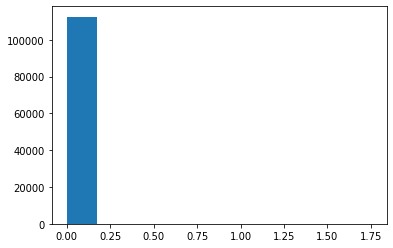

In [17]:
graph.hist(norms)

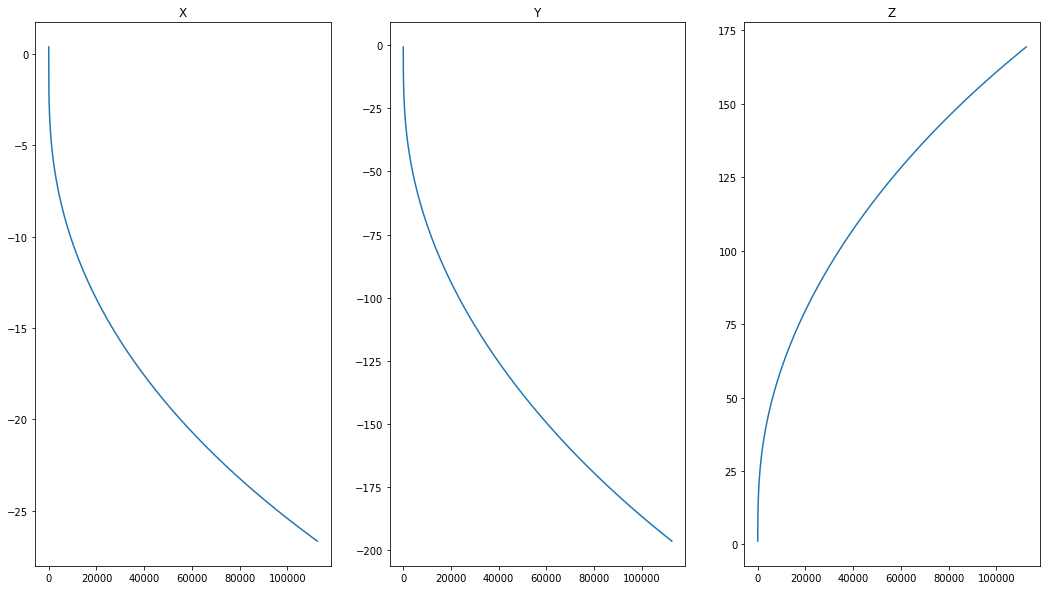

In [18]:
x = [float(weight.T[0]) for weight in weights]
y = [float(weight.T[1]) for weight in weights]
z = [float(weight.T[2]) for weight in weights]

figure = graph.figure(figsize=(18,10))

graph.subplot(1,3,1)
graph.plot(x)
graph.title('X')

graph.subplot(1,3,2)
graph.plot(y)
graph.title('Y')

graph.subplot(1,3,3)
graph.plot(z)
graph.title('Z')

graph.show()

In [19]:
liklihoods[-1] == max(liklihoods)

True

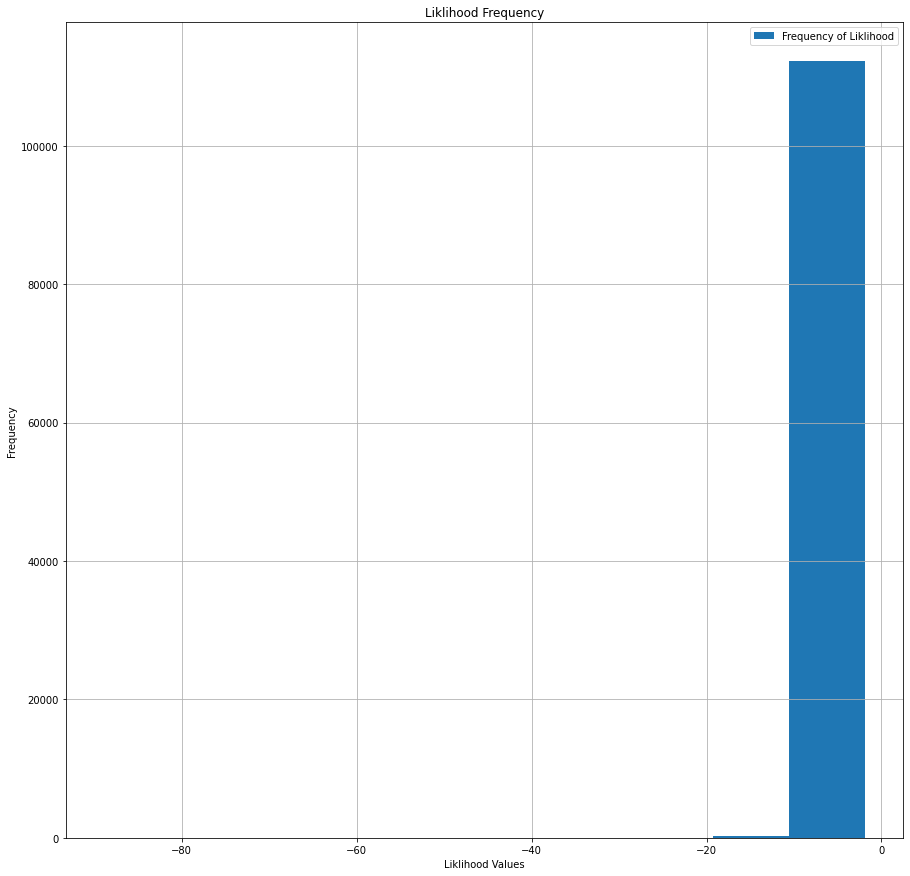

In [20]:
figure = graph.figure(figsize=(15,15))
graph.hist(liklihoods,label = 'Frequency of Liklihood')
graph.legend()
graph.title("Liklihood Frequency")
graph.grid()
graph.xlabel("Liklihood Values")
graph.ylabel("Frequency")
graph.show()

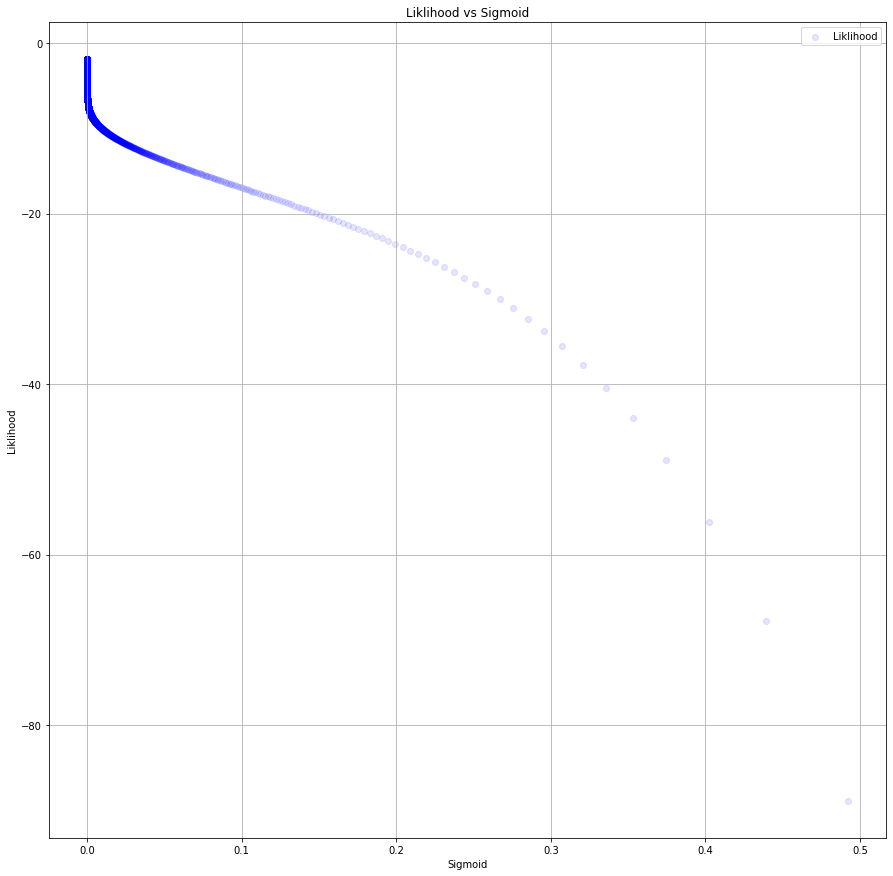

In [21]:
figure = graph.figure(figsize=(15,15))
graph.scatter(sigmoids,liklihoods,c = 'blue',label = 'Liklihood',alpha = 0.1)
graph.legend()
graph.title("Liklihood vs Sigmoid")
graph.grid()
graph.xlabel("Sigmoid")
graph.ylabel("Liklihood")
graph.show()

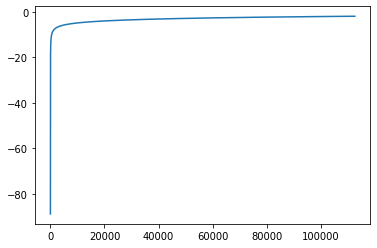

In [22]:
graph.plot(liklihoods)

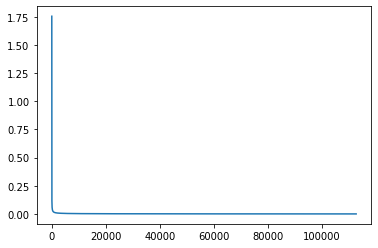

In [23]:
graph.plot(norms)

In [24]:
threshold = 0.5

In [25]:
X = df_test.iloc[:,:-1]
Y = df_test.iloc[:,-1]
y_hat = []
dbs = []

for i in range(len(df_test)):
    x = X.iloc[i]
    y = Y.iloc[i]
    y_hat.append(logit(x,w_star))
    dbs.append(w_star.T@x)

y_hat = [1 if y > threshold else 0 for y in y_hat]
df_test['y_hat'] = y_hat

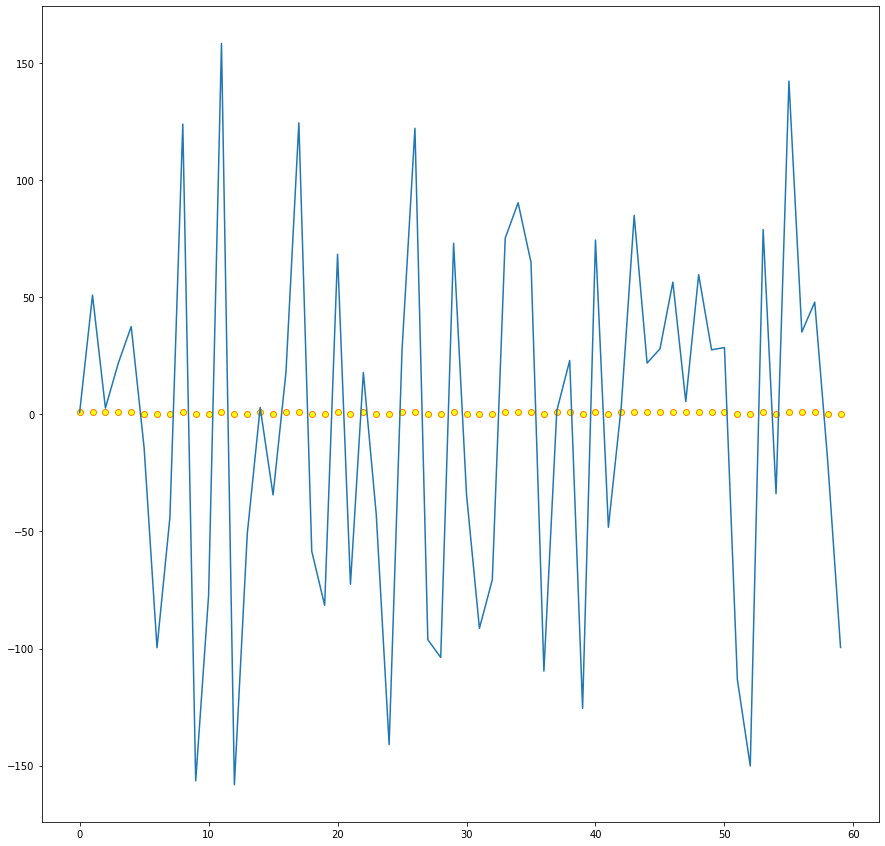

In [26]:
figure = graph.figure(figsize=(15,15))
graph.scatter([i for i in range(len(df_test['y']))],df_test['y'],alpha = 0.8,color = 'yellow')
graph.scatter([i for i in range(len(df_test['y_hat']))],df_test['y_hat'], alpha = 0.5, edgecolor = 'red',color = 'yellow')
graph.plot(dbs)

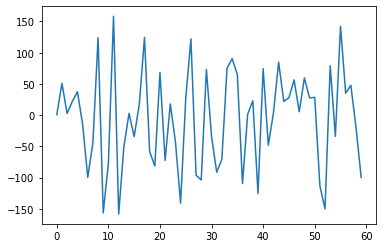

In [27]:
graph.plot(dbs)

In [28]:
create_confusion_matrix(df_test['y'],df_test['y_hat'])

Confusion Matrix :  {'tp': 34, 'tn': 26, 'fp': 0, 'fn': 0}
Accuracy :  100.0
Precision :  100.0
Senstivity :  100.0
Specificity :  100.0
